In [ ]:
# Init global infos
%load_ext tensorboard
%tensorflow_version 2.x
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import backend as K
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

batch_size = 50
num_classes = 10
num_train_samples = 1000

# the data, split between train and test sets
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

Using TensorFlow backend.


60000 train samples


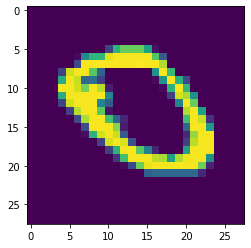

In [ ]:
def rotate_image(images, degrees):
    rot_images = []
    for image in images:
        img_rot = ndimage.rotate(image, degrees, reshape=False)
        rot_images.append(img_rot.reshape(28, 28))
    return np.array(rot_images)

# applying transformation to image
plt.imshow(x_train_orig[1].reshape(28, 28))
img_rot = ndimage.rotate(x_train_orig[1], 90, reshape=False)
plt.imshow(img_rot.reshape(28, 28))

x_train_rot_20 = rotate_image(x_train_orig, 20)
x_test_rot_20 = rotate_image(x_test_orig, 20)

x_train_rot_40 = rotate_image(x_train_orig, 40)
x_test_rot_40 = rotate_image(x_test_orig, 40)
    
print(x_train_rot_40.shape[0], 'train samples')

def reshapeImages(images):
    images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    images = images.astype('float32')
    images /= 255
    print(images.shape[0], 'samples')
    return (images)

def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('#f Iterations')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
x_train_rot_60 = rotate_image(x_train_orig, 60)
x_test_rot_60 = rotate_image(x_test_orig, 60)

x_val_rot_60 = reshapeImages(x_train_rot_60)[-num_train_samples:]
x_train_rot_60 = reshapeImages(x_train_rot_60)[:-num_train_samples]
x_test_rot_60 = reshapeImages(x_test_rot_60)
    

60000 samples
60000 samples
10000 samples


In [ ]:
x_val = reshapeImages(x_train_orig)[-num_train_samples:]
x_train = reshapeImages(x_train_orig)[:-num_train_samples]
x_test = reshapeImages(x_test_orig)

x_val_rot_20 = reshapeImages(x_train_rot_20)[-num_train_samples:]
x_train_rot_20 = reshapeImages(x_train_rot_20)[:-num_train_samples]
x_test_rot_20 = reshapeImages(x_test_rot_20)

x_val_rot_40 = reshapeImages(x_train_rot_40)[-num_train_samples:]
x_train_rot_40 = reshapeImages(x_train_rot_40)[:-num_train_samples]
x_test_rot_40 = reshapeImages(x_test_rot_40)

# convert class vectors to binary class matrices
y_val = keras.utils.to_categorical(y_train_orig, num_classes)[-num_train_samples:]
y_train = keras.utils.to_categorical(y_train_orig, num_classes)[:-num_train_samples]
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

60000 samples
60000 samples
10000 samples
60000 samples
60000 samples
10000 samples
60000 samples
60000 samples
10000 samples


In [ ]:
input1 = keras.layers.Input(shape=(784, ))
dense1 = keras.layers.Dense(128, activation='relu')(input1)
dense2 = keras.layers.Dense(128, activation='relu')(dense1)
dense3 = keras.layers.Dense(20, activation='relu')(dense2)
output = keras.layers.Dense(num_classes, activation='softmax')(dense3)

model = keras.Model(inputs=input1, outputs=[output])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2580      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 119,782
Trainable params: 119,782
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(np.concatenate([x_train, x_train_rot_40], axis=0), np.concatenate([y_train,y_train],axis=0), 
                    epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
2360/2360 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.9184 - val_loss: 0.1314 - val_accuracy: 0.9700
Epoch 2/10
2360/2360 [==============================] - 6s 2ms/step - loss: 0.1200 - accuracy: 0.9629 - val_loss: 0.1109 - val_accuracy: 0.9740
Epoch 3/10
2360/2360 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9719 - val_loss: 0.0995 - val_accuracy: 0.9780
Epoch 4/10
2360/2360 [==============================] - 6s 3ms/step - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.1235 - val_accuracy: 0.9740
Epoch 5/10
2360/2360 [==============================] - 6s 2ms/step - loss: 0.0582 - accuracy: 0.9811 - val_loss: 0.1318 - val_accuracy: 0.9760
Epoch 6/10
2360/2360 [==============================] - 8s 3ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.1079 - val_accuracy: 0.9760
Epoch 7/10
2360/2360 [==============================] - 8s 3ms/step - loss: 0.0422 - accuracy: 0.9858 - val_loss: 0.1372 - val_accuracy:

In [ ]:
score = model.evaluate(x_test_rot_60, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5496716499328613
Test accuracy: 0.8866000175476074


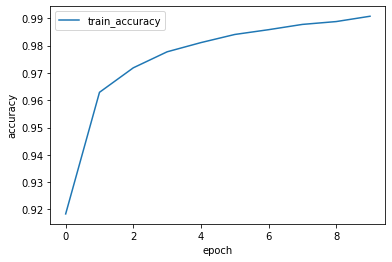

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')
plt.show()